<a href="https://colab.research.google.com/github/dscohen75/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
# Your Work Here

import pandas as pd
import matplotlib.pyplot as plt

## Pandas Plotting

In [2]:
df = pd.DataFrame({'a':[1,3,2,4,2], 'b': [4,6,8,7,6]})

df.head()

,a,b
0,1,4
1,3,6
2,2,8
3,4,7
4,2,6


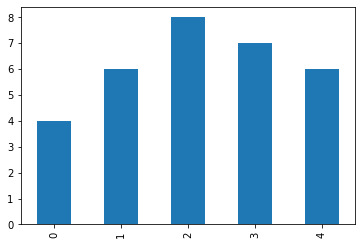

In [10]:
df['a'].plot()
df['b'].plot()
plt.show()

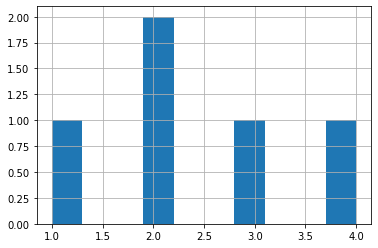

In [5]:
df['a'].hist()

## Figure, Axes syntax

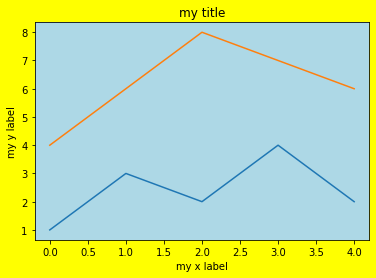

In [6]:
fig, ax = plt.subplots()

fig.set_facecolor('yellow')

ax.plot(df['a'])
ax.plot(df['b'])

ax.set_facecolor("lightblue")

ax.set_title('my title')
ax.set_xlabel('my x label')
ax.set_ylabel('my y label')

plt.show()

## Making explanatory visualizations with Matplotlib

Reproduce the example by FiveThrityEight

In [7]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)


Make prototypes, to help understand the problem.



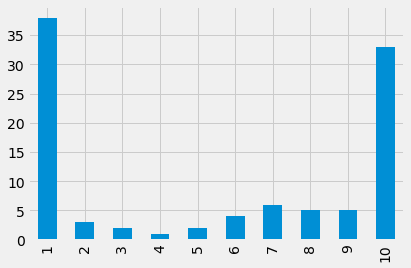

In [14]:
# Exploratory Graph
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))
fake.plot.bar();

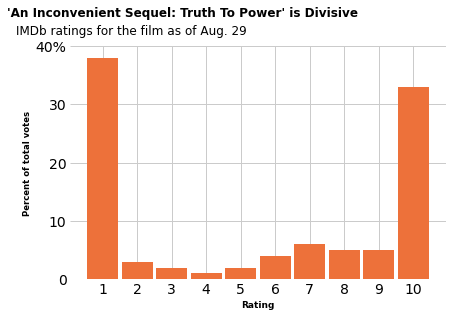

In [16]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# fig background color
fig.set_facecolor('white')

#bars on the graph
ax.bar([1,2,3,4,5,6,7,8,9,10], fake, color='#ED713A', width=.9)

#axes background color
ax.set_facecolor('white')

#axis labels
ax.set_xlabel('Rating', fontweight='bold', fontsize=9)
ax.set_ylabel('Percent of total votes', fontweight='bold', fontsize=8.5)

#Title of the graph
ax.set_title("'An Inconvenient Sequel: Truth To Power' is Divisive", fontsize=12, fontweight='bold', x=0.3, y=1.1)

#Subtitle of graph
#bottom left corner of the lable is located on the coordinate plane as specified
ax.text(x=-1.5, y=42, s="IMDb ratings for the film as of Aug. 29", fontsize=12)

# set ticks positions (x and y)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0,10,20,30,40])

ax.set_yticklabels([0, 10, 20, 30, '40%'])

#Turn off the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()



### Here's the one I want to reproduce from FiveThityEight's shared data repository.

In [65]:
url2 = 'https://fivethirtyeight.com/wp-content/uploads/2016/05/bialik-fridaythe13th-2.png?w=1150'

example2 = Image(url=url2, width=450)

display(example2)

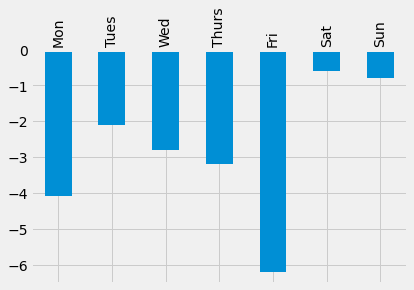

In [31]:
births = pd.Series([-4.1, -2.1, -2.8, -3.2, -6.2, -0.6, -0.8], index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

births.plot.bar();

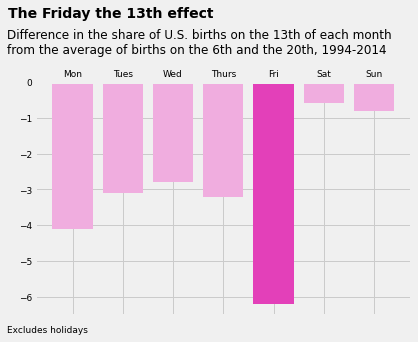

In [75]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

colors = ['#f0addf','#f0addf','#f0addf','#f0addf','#e340b9','#f0addf','#f0addf']
ax.bar(x = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], height = [-4.1, -3.1, -2.8, -3.2, -6.2, -0.6, -0.8], width = 0.8, color = colors)

ax.set_title('The Friday the 13th effect', fontsize = 14, fontweight = 'bold', x=0.2, y=1.25)
ax.text(x = -1.3, y = 0.8,\
        s = "Difference in the share of U.S. births on the 13th of each month \nfrom the average of births on the 6th and the 20th, 1994-2014",\
        fontsize = 12)

ax.text(x = -1.3, y = -7, s="Excludes holidays", fontsize=9)

ax.tick_params(axis='x', direction='out', labelsize=9)
ax.tick_params(axis='y', labelsize=9)

plt.show()

In [66]:
display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here